### Notebook Goal
Exploratory Data Analysis is being performed on this dataset of car sales.
The following dataset is going to be:
* Cleaned, check for any duplicates or missing values, and ensure the correct datatypes are in place.
* Statistical analysis will be performed to find key metrics about data
* Results of statistical analysis will be plotted

In [1]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [62]:
import seaborn as sns

In [9]:
carsDF = pd.read_csv(r'C:\Users\mikey\Desktop\Tripple Ten\Sprint 4 project\Sprint-4-Project-Web-Application\vehicles_us.csv')

In [15]:
def analyze_data(df):
    print(df.head())
    print(' ')
    print(df.info())
    print(' ')
    print('----------------------------')
    print('Potential Duplicates')
    print(' ')
    print(df.duplicated().sum())
    print(' ')
    print('----------------------------')
    print(' ')
    print('Potential Missing Values')
    print(' ')
    print(df.isna().sum())

In [17]:
analyze_data(carsDF)

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28  
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   C

In [25]:
carsDF[['model', 'model_year', 'type', 'is_4wd']].head(20)

,model,model_year,type,is_4wd
0,bmw x5,2011.0,SUV,1.0
1,ford f-150,NaN,pickup,1.0
2,hyundai sonata,2013.0,sedan,NaN
3,ford f-150,2003.0,pickup,NaN
4,chrysler 200,2017.0,sedan,NaN
5,chrysler 300,2014.0,sedan,1.0
6,toyota camry,2015.0,sedan,NaN
7,honda pilot,2013.0,SUV,1.0
8,kia sorento,2012.0,SUV,1.0
9,honda pilot,2008.0,SUV,1.0


After further analysis it is concluded that 1 is for yes and NaN is for no if the car has 4wd

In [40]:
(carsDF['odometer'].notna() & carsDF['odometer'] % 1 != 0).sum()

0

Checking to see if odometer column has any decimal value besides 0.

In [48]:
(carsDF['cylinders'].notna() & carsDF['cylinders'] % 1 != 0).sum()

0

Checking to see if cylinders column has any decimal value besides 0.

### carsDF description
This dataset has 51,525 entries with 13 columns. No duplicates have been found and there are multiple columns with missing values. Incorrect datatypes go as follows: model_year, cylinders, is_4wd, odometer, and date_posted 

#### Dataset Corrections
* Change datatypes
  - model_year float to int
  - cylinders float to int
  - odometer float to int
  - is_4wd if float to int
  - date_posted object to datetime
* Missing values
   - model_year fill with 0
   - cylinders fill with 0
   - odometer fill with 0
   - paint_color fill with Unknown
   - is_4wd fill with 0 

In [52]:
carsDF[['model_year', 'cylinders', 'is_4wd', 'odometer']] = carsDF[['model_year', 'cylinders', 'is_4wd', 'odometer']].fillna(0).astype(int)

In [54]:
carsDF['paint_color'] = carsDF['paint_color'].fillna('unknown')

In [56]:
carsDF['date_posted'] = pd.to_datetime(carsDF['date_posted'], format = '%Y-%m-%d')

In [58]:
analyze_data(carsDF)

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5       good          6  gas    145000   
1  25500           0      ford f-150       good          6  gas     88705   
2   5500        2013  hyundai sonata   like new          4  gas    110000   
3   1500        2003      ford f-150       fair          8  gas         0   
4  14900        2017    chrysler 200  excellent          4  gas     80903   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV     unknown       1  2018-06-23           19  
1    automatic  pickup       white       1  2018-10-19           50  
2    automatic   sedan         red       0  2019-02-07           79  
3    automatic  pickup     unknown       0  2019-03-22            9  
4    automatic   sedan       black       0  2019-04-02           28  
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   C

Confirming the changes made to the carsDF dataset, changes are correct.

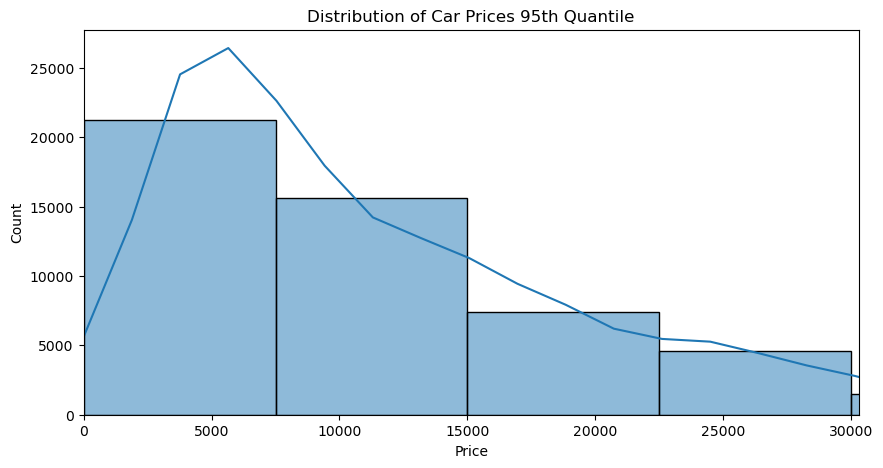

In [115]:
plt.figure(figsize = (10, 5))
sns.histplot(carsDF['price'], bins = 50, kde = True)
plt.xlim(0, carsDF['price'].quantile(0.95))
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Car Prices 95th Quantile')
plt.show()

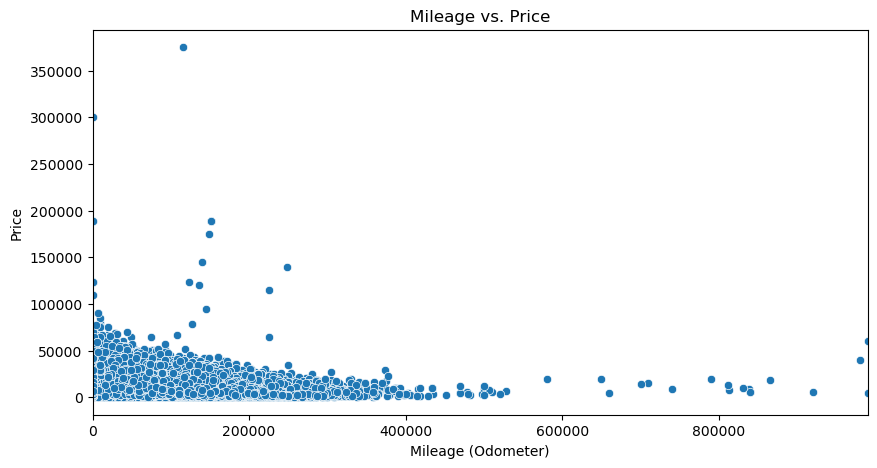

In [99]:
plt.figure(figsize = (10, 5))
sns.scatterplot(x = carsDF['odometer'], y = carsDF['price'])
plt.xlim(0, carsDF['odometer'].max())
plt.xlabel('Mileage (Odometer)')
plt.ylabel('Price')
plt.title('Mileage vs. Price')
plt.show()

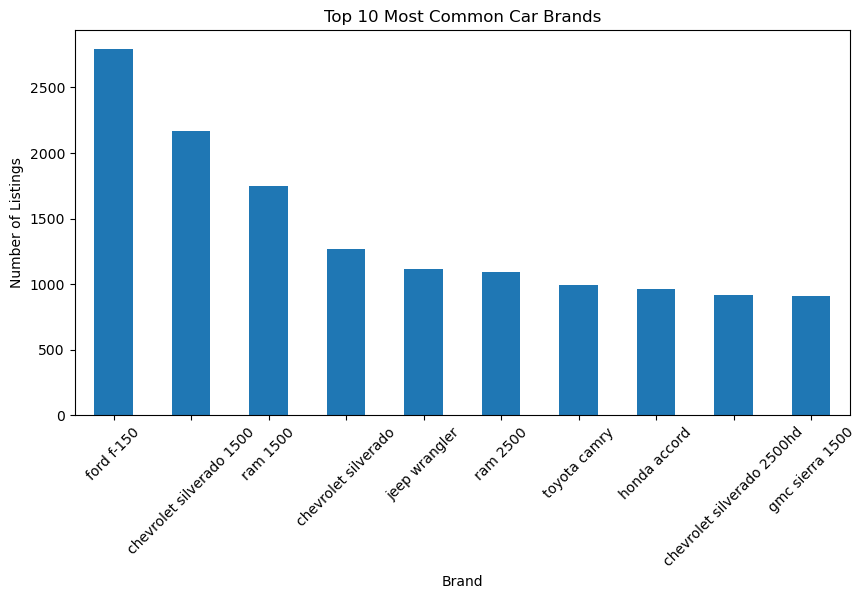

In [113]:
carsDF['model'].value_counts().head(10).plot(kind = 'bar', figsize = (10, 5))
plt.xlabel('Brand')
plt.xticks(rotation = 45)
plt.ylabel('Number of Listings')
plt.title('Top 10 Most Common Car Brands')
plt.show()